# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [129]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [130]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [131]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [132]:
#query="""
#    select * 
#    from agg.t_msb1m  
#    where year = 2019 and site=84 and min = 0 and month = 6 ,month between 6 and 10
#"""

In [165]:
query="""
    select * 
    from agg.tidy_data_final  
    where year = 2020 and site = 20 and month between 2 and 3
"""

In [166]:
df = pd.read_sql_query(query, conn)

C:\Users\xlow6\AppData\Local\Temp\ipykernel_17412\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [168]:
df.info()
df.head(-10)
# month and season if long term
# sunshine direction 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   timestamp                  2780 non-null   datetime64[ns, UTC]
 1   site                       2780 non-null   int64              
 2   year                       2780 non-null   int64              
 3   month                      2780 non-null   int64              
 4   day                        2780 non-null   int64              
 5   hour                       2780 non-null   int64              
 6   minute                     2780 non-null   int64              
 7   day_of_week                2780 non-null   int64              
 8   season                     2780 non-null   int64              
 9   net_load                   2780 non-null   float64            
 10  precipitation              2780 non-null   float64            
 11  prec

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,...,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2020-01-31 23:00:00+00:00,20,2020,2,1,0,0,5,1,285.43000,...,51.0,229.0,13.0,0.0,0.0,495.70,53.020000,299.53,162.28,1
1,2020-01-31 23:30:00+00:00,20,2020,2,1,0,30,5,1,303.27000,...,51.0,229.0,13.0,0.0,0.0,496.37,70.540000,309.13,148.33,1
2,2020-02-01 00:30:00+00:00,20,2020,2,1,1,30,5,1,268.95000,...,54.0,232.0,14.0,0.0,0.0,396.46,53.919287,268.95,139.57,1
3,2020-02-01 00:00:00+00:00,20,2020,2,1,1,0,5,1,402.69000,...,54.0,232.0,14.0,0.0,0.0,452.94,55.300000,306.86,110.31,1
4,2020-02-01 01:00:00+00:00,20,2020,2,1,2,0,5,1,307.15357,...,58.0,234.0,14.0,0.0,0.0,372.43,62.600000,307.15,166.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,2020-03-29 19:00:00+00:00,20,2020,3,29,20,0,6,2,10.50000,...,1.0,40.0,17.0,0.0,0.0,222.74,14.960000,155.68,18.95,1
2766,2020-03-29 19:30:00+00:00,20,2020,3,29,20,30,6,2,10.87000,...,1.0,40.0,17.0,0.0,0.0,197.47,14.490000,161.22,16.66,1
2767,2020-03-29 20:00:00+00:00,20,2020,3,29,21,0,6,2,13.83000,...,2.0,43.0,15.0,0.0,0.0,216.20,15.170000,190.78,22.73,1
2768,2020-03-29 20:30:00+00:00,20,2020,3,29,21,30,6,2,13.47000,...,2.0,43.0,15.0,0.0,0.0,326.19,14.700000,212.35,18.64,1


In [169]:
# Average hourly
from sklearn.preprocessing import MinMaxScaler
df = df.drop('timestamp', axis=1)
#df = df.groupby(['year','month', 'day', 'hour']).sum().reset_index()
df['net_load_norm'] = df['net_load'] / max(abs(df['net_load']))


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site                       2780 non-null   int64  
 1   year                       2780 non-null   int64  
 2   month                      2780 non-null   int64  
 3   day                        2780 non-null   int64  
 4   hour                       2780 non-null   int64  
 5   minute                     2780 non-null   int64  
 6   day_of_week                2780 non-null   int64  
 7   season                     2780 non-null   int64  
 8   net_load                   2780 non-null   float64
 9   precipitation              2780 non-null   float64
 10  precipitation_probability  2780 non-null   float64
 11  wind_direction             2780 non-null   float64
 12  wind_speed                 2780 non-null   float64
 13  solar_radiation            2780 non-null   float

In [171]:
#df = df.rename(columns={'min': 'minute'})
df['datetime'] = pd.to_datetime(df[['year','month', 'day', 'hour']])
df = df.sort_values(by='datetime')

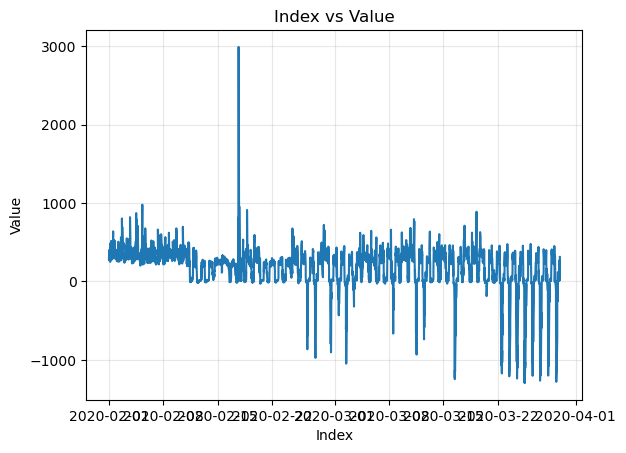

In [172]:
import matplotlib.pyplot as plt

plt.plot(df['datetime'],df['net_load'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Index vs Value')
plt.grid(alpha=0.3) 
plt.show()

(array([18293., 18300., 18307., 18314., 18322., 18329., 18336., 18343.]),
 [Text(18293.0, 0, '2020-02-01'),
  Text(18300.0, 0, '2020-02-08'),
  Text(18307.0, 0, '2020-02-15'),
  Text(18314.0, 0, '2020-02-22'),
  Text(18322.0, 0, '2020-03-01'),
  Text(18329.0, 0, '2020-03-08'),
  Text(18336.0, 0, '2020-03-15'),
  Text(18343.0, 0, '2020-03-22')])

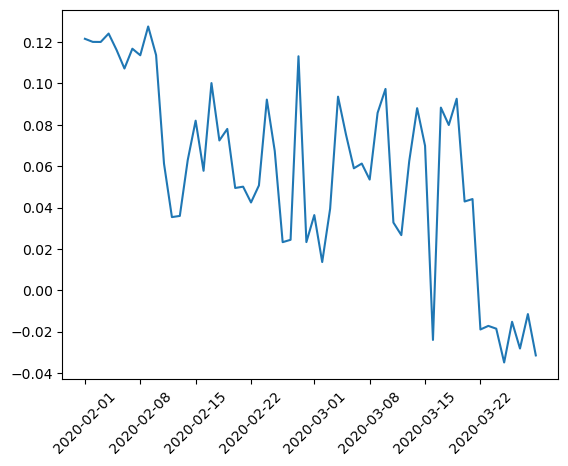

In [173]:
avg_load_day = df.groupby(df['datetime'].dt.date)['net_load_norm'].mean()
plt.plot(avg_load_day)
plt.xticks(rotation=45) 

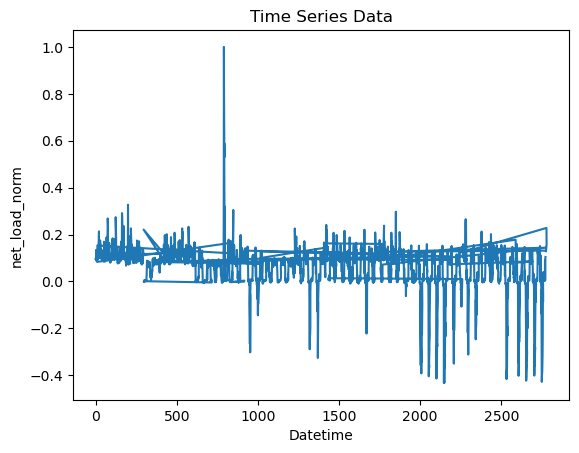

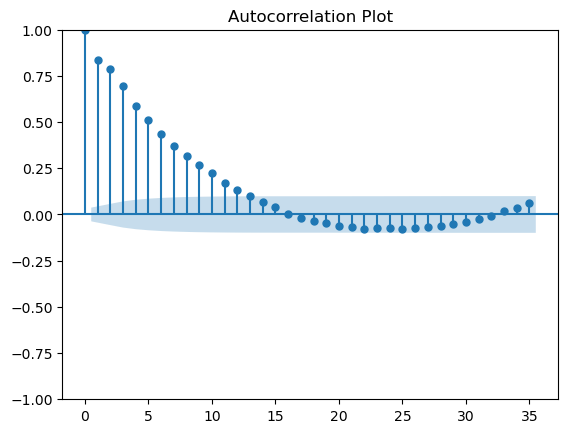

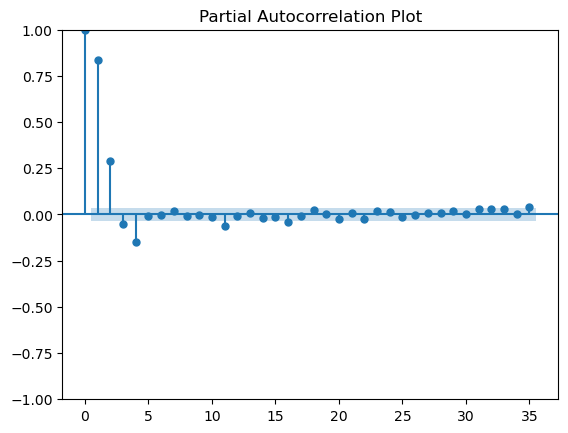

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = df.sort_values(by='datetime')

# Plot the time series data
df['net_load_norm'].plot()
plt.xlabel('Datetime')
plt.ylabel('net_load_norm')
plt.title('Time Series Data')
plt.show()

# Plot autocorrelation and partial autocorrelation plots
plot_acf(df['net_load'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(df['net_load'])
plt.title('Partial Autocorrelation Plot')
plt.show()

In [175]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
'''
df = df.sort_values(by='datetime')
results = pd.DataFrame()
for x in range(4,0,-1):
    vals = x*-24
    train_data = df.iloc[:vals]  
    test_data = df.iloc[vals:]
    test_data = test_data.iloc[:24]

    model = SARIMAX(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday']], order=(4, 1, 3), seasonal_order=(2, 1, 1, 24))
    sarimax_model = model.fit()

    sarimax_params = sarimax_model.params

    print("SARIMAX Parameters:")
    print(sarimax_params)

    forecast_horizon = 24
    forecast = sarimax_model.forecast(steps=forecast_horizon, exog=test_data[['solar_radiation','weekend_or_bank_holiday']])
    #print('Forecasted Values:', forecast)
    df_final = pd.DataFrame()
    df_final = pd.concat([test_data, forecast], axis=1)
    print(df_final)

    results = pd.concat([results, df_final],ignore_index=True)

results = results.rename(columns={results.columns[-1]: 'forecast'})

plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()
'''

'\ndf = df.sort_values(by=\'datetime\')\nresults = pd.DataFrame()\nfor x in range(4,0,-1):\n    vals = x*-24\n    train_data = df.iloc[:vals]  \n    test_data = df.iloc[vals:]\n    test_data = test_data.iloc[:24]\n\n    model = SARIMAX(train_data[\'net_load_norm\'], exog=train_data[[\'solar_radiation\',\'weekend_or_bank_holiday\']], order=(4, 1, 3), seasonal_order=(2, 1, 1, 24))\n    sarimax_model = model.fit()\n\n    sarimax_params = sarimax_model.params\n\n    print("SARIMAX Parameters:")\n    print(sarimax_params)\n\n    forecast_horizon = 24\n    forecast = sarimax_model.forecast(steps=forecast_horizon, exog=test_data[[\'solar_radiation\',\'weekend_or_bank_holiday\']])\n    #print(\'Forecasted Values:\', forecast)\n    df_final = pd.DataFrame()\n    df_final = pd.concat([test_data, forecast], axis=1)\n    print(df_final)\n\n    results = pd.concat([results, df_final],ignore_index=True)\n\nresults = results.rename(columns={results.columns[-1]: \'forecast\'})\n\nplt.figure(figsize=(1

In [143]:
'''
df2 = df[-300:]
plt.figure(figsize=(10, 6))
plt.plot(df2['datetime'], df2['net_load'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()
'''

"\ndf2 = df[-300:]\nplt.figure(figsize=(10, 6))\nplt.plot(df2['datetime'], df2['net_load'], label='Observed')\nplt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')\nplt.xlabel('Date')\nplt.ylabel('Value')\nplt.title('SARIMAX Model Forecast')\nplt.legend()\nplt.xticks(rotation=45) \nplt.grid(alpha=0.3)\nplt.show()\n"

In [178]:
import pmdarima as pm
'''
train_data = df.iloc[:-288]  

start_p = 2  # Starting value of AR parameter (p)
start_d = 1  # Starting value of differencing (d)
start_q = 0  # Starting value of MA parameter (q)
max_p = 2    # Maximum value of AR parameter (p)
max_d = 1    # Maximum value of differencing (d)must be 1
max_q = 0 

start_P = 2  # Starting value of seasonal AR parameter (P)
start_D = 1  # Starting value of seasonal differencing (D)
start_Q = 0  # Starting value of seasonal MA parameter (Q)
max_P = 2    # Maximum value of seasonal AR parameter (P)
max_D = 1    # Maximum value of seasonal differencing (D) must be 1
max_Q = 0    # Maximum value of seasonal MA parameter (Q)

model_auto = pm.auto_arima(train_data['net_load_norm'], exogenous=train_data[['solar_radiation','weekend_or_bank_holiday']], seasonal=True, m=48, start_p=start_p, start_d=start_d, start_q=start_q, max_p=max_p, max_d=max_d, max_q=max_q,start_P=start_P,start_D=start_D, start_Q=start_Q, max_P=max_P, max_D=max_D, max_Q=max_Q)
#sarimax_model = model.fit()
#model_auto = SARIMAX(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday']], order=(1, 1, 1), seasonal_order=(0, 0, 0, 12))
'''


"\ntrain_data = df.iloc[:-288]  \n\nstart_p = 2  # Starting value of AR parameter (p)\nstart_d = 1  # Starting value of differencing (d)\nstart_q = 0  # Starting value of MA parameter (q)\nmax_p = 2    # Maximum value of AR parameter (p)\nmax_d = 1    # Maximum value of differencing (d)must be 1\nmax_q = 0 \n\nstart_P = 2  # Starting value of seasonal AR parameter (P)\nstart_D = 1  # Starting value of seasonal differencing (D)\nstart_Q = 0  # Starting value of seasonal MA parameter (Q)\nmax_P = 2    # Maximum value of seasonal AR parameter (P)\nmax_D = 1    # Maximum value of seasonal differencing (D) must be 1\nmax_Q = 0    # Maximum value of seasonal MA parameter (Q)\n\nmodel_auto = pm.auto_arima(train_data['net_load_norm'], exogenous=train_data[['solar_radiation','weekend_or_bank_holiday']], seasonal=True, m=48, start_p=start_p, start_d=start_d, start_q=start_q, max_p=max_p, max_d=max_d, max_q=max_q,start_P=start_P,start_D=start_D, start_Q=start_Q, max_P=max_P, max_D=max_D, max_Q=ma

In [210]:
import numpy as np
import pandas as pd
import pmdarima as pm
from tqdm import tqdm

# Assuming 'df' is your dataframe containing the data
train_data = df.iloc[:-480]

# Define ARIMA parameters ( need to trail q = 5)
start_p = 2  
start_d = 1  
start_q = 0  
max_p = 2  
max_d = 1  
max_q = 0  

start_P = 2  
start_D = 1  
start_Q = 0  
max_P = 2  
max_D = 1  
max_Q = 0  

# Determine the total iterations (a rough estimate)
total_iterations = (max_p - start_p + 1) * (max_d - start_d + 1) * (max_q - start_q + 1) * (max_P - start_P + 1) * (max_D - start_D + 1) * (max_Q - start_Q + 1)
print(total_iterations)

# Initialize tqdm progress bar
with tqdm(total=total_iterations) as pbar:
    def progress_callback(iteration):
        pbar.update(1)

    # Train ARIMA model with progress callback
    model_auto = pm.auto_arima(
        train_data['net_load_norm'],
        exogenous=train_data[['solar_radiation', 'weekend_or_bank_holiday','sunshine_duration', 'precipitation_probability']],
        seasonal=True,
        m=48,
        start_p=start_p,
        start_d=start_d,
        start_q=start_q,
        max_p=max_p,
        max_d=max_d,
        max_q=max_q,
        start_P=start_P,
        start_D=start_D,
        start_Q=start_Q,
        max_P=max_P,
        max_D=max_D,
        max_Q=max_Q,
        stepwise=True,
        callback=progress_callback
    )


1


  0%|          | 0/1 [00:00<?, ?it/s]

165it [08:06,  2.95s/it]                     


In [218]:
## 36 Hour forecast
results = pd.DataFrame()
for x in range(3,1,-1):
    vals = -x*48 +24 #to get midday
    train_data = df.iloc[:vals]  
    test_data = df.iloc[vals:]
    test_data = test_data.iloc[:72]

    model_auto.update(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday','sunshine_duration', 'precipitation_probability']], maxiter=1)
    #model_auto.update(train_data['net_load_norm'])

    sarimax_params = model_auto.params

    #print("SARIMAX Parameters:")
    #print(sarimax_params)

    #forecast_horizon = 24
    #forecast = model.forecast(steps=forecast_horizon, exog=test_data[['solar_radiation','weekend_or_bank_holiday']])
    forecast, conf_int = model_auto.predict(n_periods=72, exogenous=test_data[['solar_radiation','weekend_or_bank_holiday','sunshine_duration', 'precipitation_probability']], return_conf_int=True)
    df_final = pd.DataFrame(test_data)
    df_final['forecast'] = forecast 
    print(df_final)
    df_final = df_final[24:]

    results = pd.concat([results, df_final],ignore_index=True)
    print(x-1)

results = results.rename(columns={results.columns[-1]: 'forecast'})

plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

MemoryError: Unable to allocate 1.70 GiB for an array with shape (99, 99, 23268) and data type float64

In [216]:
## Day Forecast
results = pd.DataFrame()
for x in range(4,0,-1):
    vals = -x*48
    train_data = df.iloc[:vals]  
    test_data = df.iloc[vals:]
    test_data = test_data.iloc[:48]

    model_auto.update(train_data['net_load_norm'], exog=train_data[['solar_radiation','weekend_or_bank_holiday','sunshine_duration', 'precipitation_probability']], maxiter=1)
    #model_auto.update(train_data['net_load_norm'])

    sarimax_params = model_auto.params

    print("SARIMAX Parameters:")
    print(sarimax_params)

    #forecast_horizon = 24
    #forecast = model.forecast(steps=forecast_horizon, exog=test_data[['solar_radiation','weekend_or_bank_holiday']])
    forecast, conf_int = model_auto.predict(n_periods=48, exogenous=test_data[['solar_radiation','weekend_or_bank_holiday','sunshine_duration', 'precipitation_probability']], return_conf_int=True)
    df_final = pd.DataFrame(test_data)
    df_final['forecast'] = forecast 

    results = pd.concat([results, df_final],ignore_index=True)
    print(x)

results = results.rename(columns={results.columns[-1]: 'forecast'})

plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['net_load_norm'], label='Observed')
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)
plt.show()

KeyboardInterrupt: 

KeyError: 'datetime'

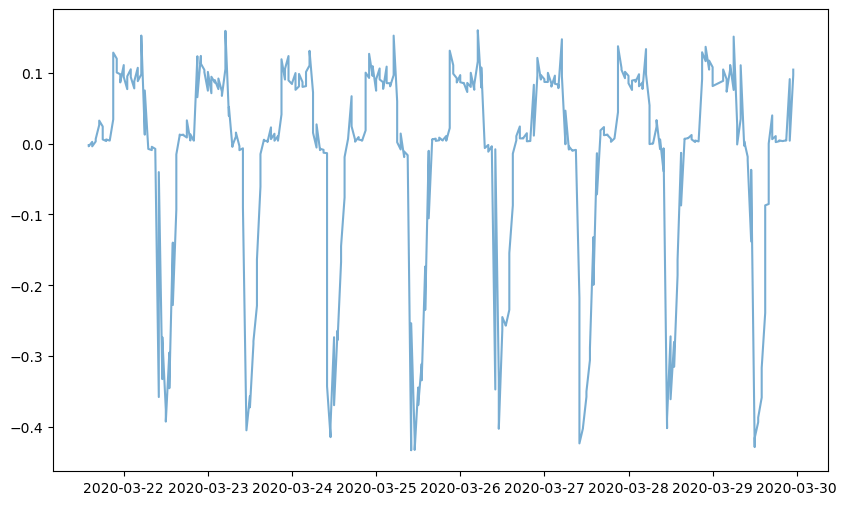

In [217]:
df2 = df[-400:]
plt.figure(figsize=(10, 6))
plt.plot(df2['datetime'], df2['net_load_norm'], label='Observed',alpha=0.6)
plt.plot(results['datetime'], results['forecast'], label='Forecast', color='red',alpha=1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Model Forecast')
plt.legend()
plt.xticks(rotation=45) 
plt.grid(alpha=0.3)


plt.axvline(x=pd.to_datetime('2020-3-24 00:00:00'), color='black', linestyle='--',linewidth=1)


plt.show()

In [184]:
from sklearn.metrics import mean_absolute_error
norm_mae = mean_absolute_error(results['net_load_norm'], results['forecast'])
print(round(norm_mae,3))

def mean_absolute_arctangent_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(np.arctan((y_true - y_pred) / np.abs(y_true)) / (np.pi / 2)))

maape = mean_absolute_arctangent_percentage_error(results['net_load_norm'], results['forecast'])
print(round(maape,3))


0.111
0.531


c:\Users\xlow6\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


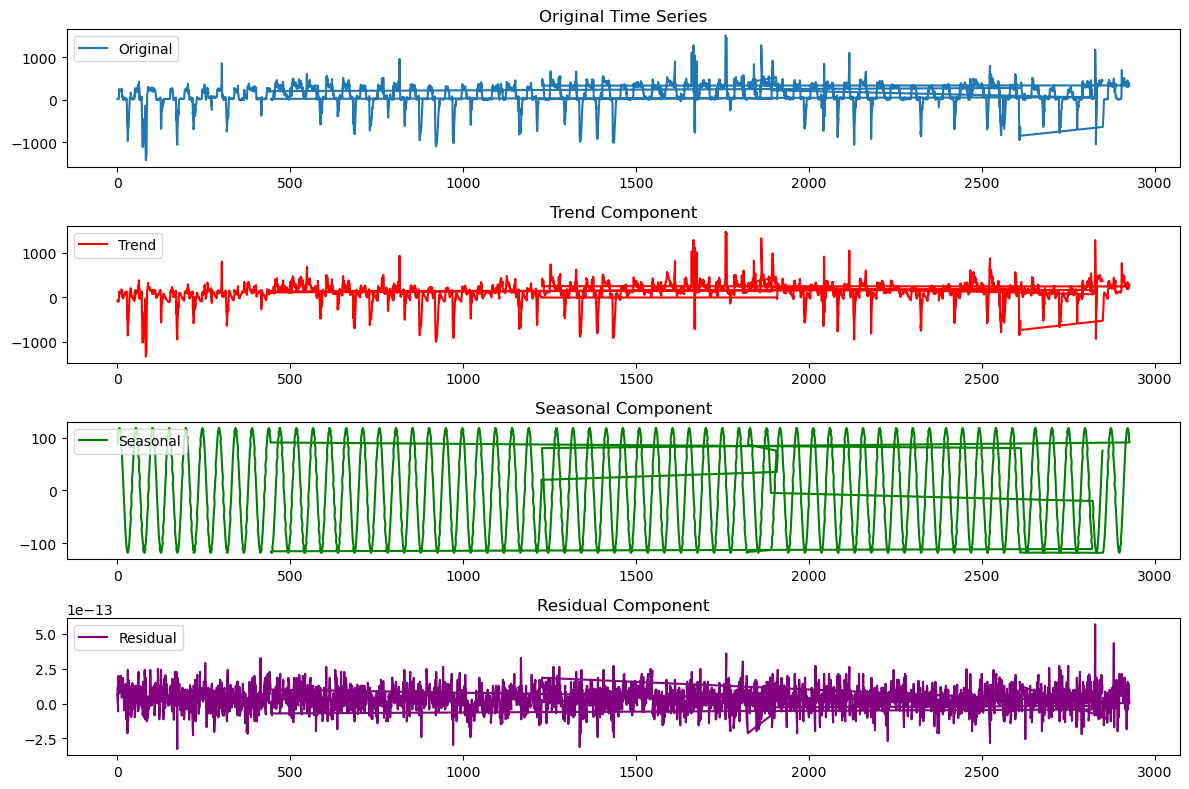

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df.set_index('datetime', inplace=True)

# Function to decompose time series using Fourier transform
def decompose_fourier(data):
    
    # Compute FFT of the time series data
    fft_values = np.fft.fft(data)
    
    # Compute the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(data))
    
    # Find the index of the highest amplitude frequency (excluding the DC component)
    highest_freq_index = np.argmax(np.abs(fft_values[1:])) + 1
    
    # Construct the signal corresponding to the highest amplitude frequency
    reconstructed_signal = np.fft.ifft(np.zeros_like(fft_values))
    reconstructed_signal[highest_freq_index] = fft_values[highest_freq_index]
    
    # Compute the trend component by removing the highest amplitude frequency from the original signal
    trend_component = np.fft.ifft(fft_values - reconstructed_signal)
    
    # Compute the seasonal component by keeping only the highest amplitude frequency
    seasonal_component = np.fft.ifft(reconstructed_signal)
    
    # Compute the residual component by subtracting the trend and seasonal components from the original signal
    residual_component = data - trend_component - seasonal_component
    
    return trend_component, seasonal_component, residual_component

# Decompose the time series data using Fourier transform
trend, seasonal, residual = decompose_fourier(df['net_load'])

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['net_load'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


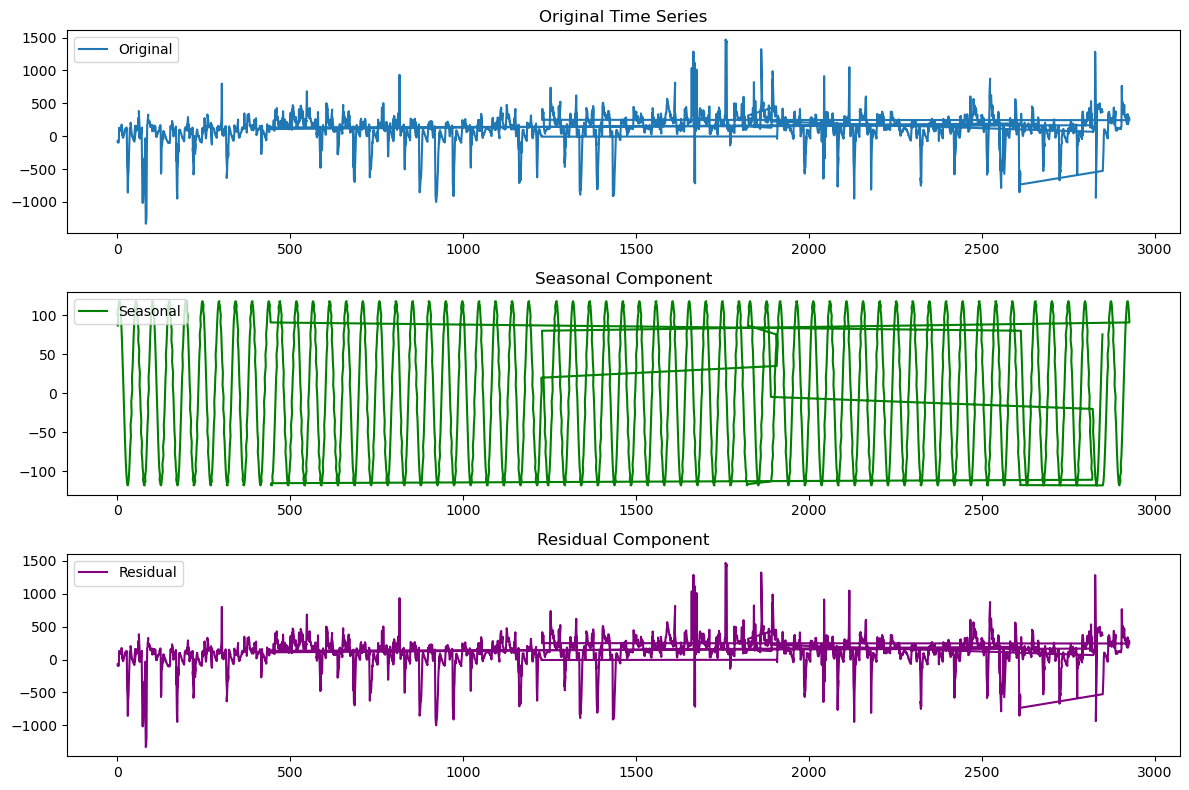

2928


In [ ]:
def decompose_fourier_multiple(data, seasonal_periods):
    # Compute FFT of the time series data
    fft_values = np.fft.fft(data)
    
    # Compute the frequencies corresponding to the FFT values
    frequencies = np.fft.fftfreq(len(data))
    
    # Initialize reconstructed signal as zeros
    reconstructed_signal = np.zeros_like(fft_values)
    
    # Iterate over seasonal periods
    for period in seasonal_periods:
        # Find the index of the highest amplitude frequency for the current period (excluding the DC component)
        highest_freq_index = np.argmax(np.abs(fft_values[1:])) + 1
        
        # Construct the signal corresponding to the highest amplitude frequency
        reconstructed_signal[highest_freq_index] = fft_values[highest_freq_index]
        
        # Compute the seasonal component by keeping only the highest amplitude frequency for the current period
        seasonal_component = np.fft.ifft(reconstructed_signal)
        
        # Subtract the seasonal component from the original signal
        data -= seasonal_component
        
        # Reset the reconstructed signal for the next seasonal component
        reconstructed_signal = np.zeros_like(fft_values)
    
    # Compute the residual component (what remains after removing all seasonal components)
    residual_component = data
    
    return seasonal_component, residual_component

# Decompose the time series data using Fourier transform with multiple seasonal components
seasonal, residual = decompose_fourier_multiple(df['net_load'], seasonal_periods=[24])  # Example seasonal periods

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(df.index, df['net_load'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(312)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(313)
plt.plot(df.index, residual, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()
print(len(seasonal))

In [ ]:
from scipy.optimize import curve_fit

T_d = 24  # Period of one day (in hours)
T_y = 365 * 24  # Period of one year (in hours)

def fourier_series(t, a0, *params):
    N = len(params) // 6  # Number of harmonics
    an = params[:N]
    bn = params[N:2*N]
    cm = params[2*N:3*N]
    dm = params[3*N:]
    series_day = sum(a * np.cos(2 * np.pi * n * t / T_d) + b * np.sin(2 * np.pi * n * t / T_d) for n, (a, b) in enumerate(zip(an, bn), start=1))
    series_year = sum(c * np.cos(2 * np.pi * m * t / T_y) + d * np.sin(2 * np.pi * m * t / T_y) for m, (c, d) in enumerate(zip(cm, dm), start=1))
    print(series_day)
    print(series_year)
    return a0 + series_day + series_year

# Initial guess for parameters
initial_guess = [np.mean(df['net_load'])] + [0] * 4

# Fit Fourier series to data
params, _ = curve_fit(fourier_series, np.arange(len(df)), df['net_load'], p0=initial_guess)

# Reconstruct seasonality
seasonality = fourier_series(np.arange(len(df)), params[0],params)

# Plot original data and reconstructed seasonality
plt.figure(figsize=(10, 6))
#plt.plot(df.index, df['net_load'], label='Observed Data', color='blue')
plt.plot(seasonality)
#plt.plot(df.index, seasonality, label='Seasonality', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data and Reconstructed Seasonality')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\xlow6\AppData\Roaming\Python\Python311\site-packages\pandas\core\series.py:1022: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.asarray(values, dtype=dtype)


0
0


TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'